<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"><b>Traveling Student Problem</b></span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://mate.unipv.it/gualandi" property="cc:attributionName" rel="cc:attributionURL">Stefano Gualandi</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.<br />Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/mathcoding/opt4ds" rel="dct:source">https://github.com/mathcoding/opt4ds</a>.

# 8. The Traveling Student Problem
In this lab session, you have to model and solve the **Traveling Student Problem (TSP)** by using **Integer Linear Programming**.

The TSP problem is defined as follows. You are given a set of $n$ university residences where a *matricola* (freshman) must go to sell the tickets for her/his college spring-party. The position of each residence is given by the geographic coordinates: in this exercise, the coordinates are points in an Euclidean plane. The distance $d_{ij}$ between any pair of residence is equal to the Euclidean distance between the corresponding pair of points.

The TSP problem is to find the shortest cycle among all the residences (starting from the student residence and ending in the same residence) that minimizes the overall travelled distance.

**NOTE:** For a more formal definition of the **Travelling Salesman Problem** see the course slides, or visit [Bill's Cook homepage for Concorde](https://www.math.uwaterloo.ca/tsp/concorde.html). Or, even better, you can look at this two lectures:

* [Math Encounters: "Optimal Tours: The Traveling Salesman Problem" with Bill Cook on August 4, 2021](https://www.youtube.com/watch?v=tChnXG6ulyE)
* [The Traveling Salesman Problem: Postcards from the Edge of Impossibility](https://www.youtube.com/watch?v=5VjphFYQKj8)

## 8.1 Helper functions
To facilitate the modeling activity, the following functions are provided with this notebook:

1. A function `BuildDiGraph` to compute the distance between a pair of points, return a distance matrix.

2. Two parse functions `BuildDiGraph` and `BuildGraph` to build a graph from a matrix of distances. The first function build a directed graph, the second an undirected graph (for symmetric TSP). In general the instances of the TSP are given in the [TSPLIB format](https://www.math.uwaterloo.ca/tsp/concorde.html).


3. A function to plot a solution. You can use this function *manually* to visualize possible simple solutions. The `PlotTour(Ps, Ls, values)` takes in input a list of coordinates `Ps` of the residences (the first point is always the depot), a list of arcs in the solution `Ls`, and a list of values for each possible arc `values` so that you can plot also fractional solutions.

Those functions are written below.

In [6]:
# Import the Numerical Python library
import numpy as np
from math import sqrt

def CostMatrix(Ls):
    n = len(Ls)
    C = 100000*np.ones((n,n))
    for i, (a,b) in enumerate(Ls):
        for j, (c,d) in enumerate(Ls[i+1:]):
            C[i, i+j+1] = sqrt((a-c)**2 + (b-d)**2)
            C[i+j+1, i] = C[i, i+j+1]
            
    return C

In [7]:
# Import the NetworkX library
import networkx as nx

def BuildDiGraph(C):
    # Build a directed graph out of the data
    G = nx.DiGraph()
    
    n,n = C.shape
    for i in range(n):
        for j in range(n):
            if i != j:
                G.add_edge(i, j, weight=C[i,j])

    return G

def BuildGraph(C):
    # Build an undirected graph out of the data
    G = nx.Graph()
    
    n,n = C.shape
    for i in range(n):
        for j in range(n):
            if i < j:
                G.add_edge(i, j, weight=C[i,j])

    return G

In [8]:
import pylab as pl
from matplotlib import collections as mc

def PlotTour(Ps, Ls, values):
    lines = [[Ps[i], Ps[j]] for i,j in Ls]
    fig, ax = pl.subplots()

    lc = mc.LineCollection(lines, linewidths=[1.5 if x > 0.501 else 1 for x in values],
                           colors=['blue' if x > 0.501 else 'orange' for x in values])
    
    ax.add_collection(lc)
    ax.scatter([i for i,j in Ps], [j for i,j in Ps], 
                s=20, alpha=0.8, color='red')
    
    ax.autoscale()
    ax.margins(0.1)
    ax.axis('equal')
    pl.show()


Given the following list of university residences in Pavia, you can use the previous function in the following way.

In [ ]:
# Residenza Collegiali a Pavia
Rs = [(45.1882789,9.1600456, 'Del Maino', 0),
      (45.1961107,9.1395709, 'Golgi', 1), (45.1851618,9.1506323, 'Senatore', 2),
      (45.1806049,9.1691651, 'Don Bosco', 3), (45.1857651,9.1473637, 'CSA', 4),
      (45.1802511,9.1591663, 'Borromeo', 5), (45.1877192,9.1578934, 'Cairoli', 6),
      (45.1870975,9.1588276, 'Castiglioni', 7), (45.1871301,9.1435067, 'Santa Caterina', 8),
      (45.1863927,9.15947, 'Ghislieri', 9), (45.2007148,9.1325475, 'Nuovo', 10),
      (45.1787292,9.1635482, 'Cardano', 11), (45.1864928,9.1560687, 'Fraccaro', 12),
      (45.1989668,9.1775168, 'Griziotti', 13), (45.1838819,9.161318, 'Spallanzani', 14),
      (45.1823523,9.1454315, 'Valla', 15), (45.2007816,9.1341354, 'Volta', 16),
      (45.2070857,9.1382623, 'Residenza Biomedica', 17)]

# Santa Caterina: (45.188019,9.161331)

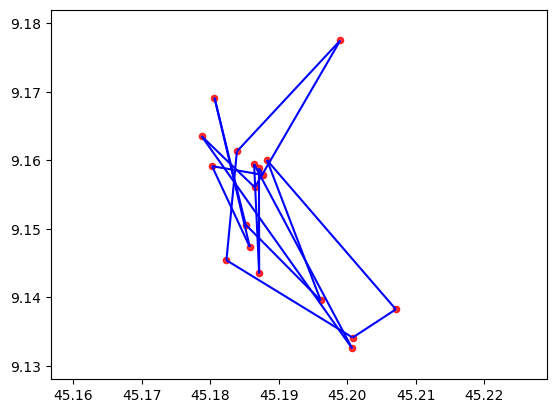

In [13]:
Ps = [(x,y) for x,y,_,_ in Rs]
C = CostMatrix(Ps)
G = BuildDiGraph(C)

# Build a "drunk"-random tour
n = len(Ps)
values = [1 for _ in range(n)]

if True:
    RandomTour = [(i, (i+1)%n) for i in range(n)]
    PlotTour(Ps, RandomTour, values)
else:
    ManualTour = [(0,17), (17, 16), (16,10), (10, 15), (15, 0)]
    PlotTour(Ps, ManualTour, values)

## 8.2 Exercise: Design and solve your model
First, try to solve the problem by *paper-and-pencil*, using the graphical tool.

Second, write your model by deciding in order:

1. The decision variables.
2. The objective function.
3. The constraints.

Regarding the constraints, you could work **incrementally**, by starting with a subset of the constraints, and then by refining your model with additional constraints. 

In [ ]:
# Exercise: write a function to check the feasibility of your solution
def CheckFeasibility(sol):
    # TODO: complete this function
    return True

# TODO: complete the following script with your solution
def SolveTSP(G, TIME_LIMIT=60):
    # TODO: WRITE YOUR GUROBI MODEL
    # ....
    
    
    
    
                        
    # Return objective value and selected arcs
    return 0, []
   

To solve the spring-party problem, you can execute the following commands (after having written your full model).

In [ ]:
Test = 2

# Compute Cost Matrix
Ls = [(b,a) for a,b,_,_ in Rs]

# Compute cost matrix
C = CostMatrix(Ls)

G = BuildDiGraph(C)
z_lp, tour = SolveTSP(G)

## 7.3 Solving Ulysses and other instances
You can try your model using other TSP instances:

1. The Ulysses epic travel. Read about the mathematical implications [Groetschel's paper "Optimized Odyssey"](https://www.zib.de/groetschel/pubnew/paper/groetschelpadberg2001a.pdf).

2. The October Fest from Monaco.

3. A random (easy instance) of points in the plane.

You find the data instance defined below as a list of points.

In [ ]:
# INSTANCES TAKE FROM THE TSPLIB:
#   http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/

ULYSSES = [(38.24, 20.42), (39.57, 26.15), (40.56, 25.32), (36.26, 23.12),
           (33.48, 10.54), (37.56, 12.19), (38.42, 13.11), (37.52, 20.44),
           (41.23, 9.10), (41.17, 13.05), (36.08, -5.21), (38.47, 15.13), 
           (38.15, 15.35), (37.51, 15.17), (35.49, 14.32), (39.36, 19.56)]
     
BAVIERA = [(1150.0,  1760.0), (630.0,  1660.0),  (40.0,  2090.0),    (750.0,  1100.0), 
  (1030.0,  2070.0), (1650.0,   650.0), (1490.0,  1630.0),  (790.0,  2260.0),
  (710.0,  1310.0),  (840.0,   550.0),  (1170.0,  2300.0),  (970.0,  1340.0),
  (510.0,   700.0),  (750.0,   900.0),  (1280.0,  1200.0),  (230.0,   590.0),
  (460.0,   860.0),  (1040.0,   950.0), (590.0,  1390.0),   (830.0,  1770.0),
  (490.0,   500.0),  (1840.0,  1240.0), (1260.0,  1500.0),  (1280.0,  790.0),
  (490.0,  2130.0),  (1460.0,  1420.0), (1260.0,  1910.0),  (360.0,  1980.0),
  (750.0,  2030.0)]   

For random instances, you can run the following function:

In [ ]:
def RandomTSP(n, _seed=13):
    from numpy import random
    random.seed(_seed)
    return [(x,y) for x,y in zip(random.random(n), random.random(n))]

Then, you only need to select the test.

In [ ]:
Test = 1

# Compute Cost Matrix
if Test == 0:
    Ls = [(b,a) for a,b,_ in Rs]
if Test == 1:
    Ls = ULYSSES
if Test == 2:
    Ls = BAVIERA
if Test == 3:
    N = 100
    Ls = RandomTSP(N)

# Compute cost matrix
C = CostMatrix(Ls)

# Solve problem
G = BuildDiGraph(C)
z_lp, tour = SolveTSP(G)

### 8.3.1 Research Open Question: Develop methods to design small hard instances

As a research question, it is important to design small and hard TSP instances, with a large LP optimality gap. Having small instances is important to develop new efficient cutting planes algorithms.

For an overview, you can check the preprint: [On the generation of Metric TSP instances with a large integrality gap by branch-and-cut](https://arxiv.org/abs/2109.02454). You can find some small hard instances on this repo [Hard-TSPLIB](https://drive.google.com/drive/folders/1m-8mIS%5C_vlxtqqzotafe6T5cj58s4s6L7?usp=sharing), in TSPLIB format.

## 8.4 Cutting Planes for Subtour Polytope
Can you write a model with an exponential number of subtour elimination constraints which are **separated** dynamically, by solving an auxiliary optimization problem?

In [ ]:
# Write the code for your cutting plane procedure

## 8.5 Primal Heuristics

To solve an instance to optimality, it is important to find tight lower bounds via strong LP relaxations, and good feasible primal solution to get strong upper bounds.

Can you design a primal heuristic algorithm to find primal (feasible) solutions in polynomial time?

In [ ]:
# Write the code for you primal heuristic